In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Employee.csv")

In [3]:
df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0.0,...,0.0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
74494,47175,30,Female,15,Education,3856,Good,Medium,Average,2.0,...,0.0,Entry,Medium,20,No,No,No,Good,Medium,Left
74495,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0.0,...,4.0,Mid,Small,7,No,No,No,Good,High,Left
74496,9554,18,Male,4,Education,5276,Fair,High,Average,0.0,...,3.0,Mid,Large,5,No,No,No,Poor,High,Stayed


In [4]:
df.shape

(74498, 24)

In [5]:
df.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [6]:
df.info() #from the info we can say that it has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

In [7]:
df.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

In [8]:
df[['Work-Life Balance','Performance Rating','Number of Promotions','Education Level','Marital Status','Number of Dependents','Job Level','Company Size','Remote Work','Employee Recognition']].isnull().sum()

Work-Life Balance       4
Performance Rating      4
Number of Promotions    5
Education Level         5
Marital Status          4
Number of Dependents    6
Job Level               5
Company Size            2
Remote Work             3
Employee Recognition    2
dtype: int64

In [9]:
df[['Work-Life Balance','Performance Rating','Number of Promotions','Education Level','Marital Status','Number of Dependents','Job Level','Company Size','Remote Work','Employee Recognition']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Work-Life Balance     74494 non-null  object 
 1   Performance Rating    74494 non-null  object 
 2   Number of Promotions  74493 non-null  float64
 3   Education Level       74493 non-null  object 
 4   Marital Status        74494 non-null  object 
 5   Number of Dependents  74492 non-null  float64
 6   Job Level             74493 non-null  object 
 7   Company Size          74496 non-null  object 
 8   Remote Work           74495 non-null  object 
 9   Employee Recognition  74496 non-null  object 
dtypes: float64(2), object(8)
memory usage: 5.7+ MB


In [10]:
for i in ['Work-Life Balance','Performance Rating','Education Level','Marital Status','Job Level','Company Size','Remote Work','Employee Recognition']:
    df[i]=df[i].fillna(df[i].mode()[0])

In [11]:
for i in ['Number of Promotions','Number of Dependents']:
    print('Skewness value of column' , i ,' : ' , df[i].skew())

Skewness value of column Number of Promotions  :  0.9927217924042187
Skewness value of column Number of Dependents  :  0.7070916759977594


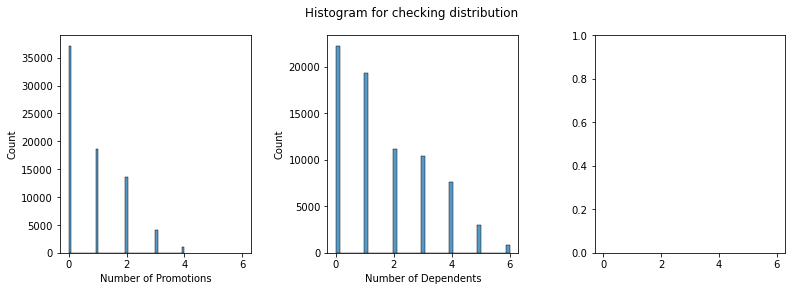

In [12]:
fig,axes = plt.subplots(1, 3, sharex=True,figsize=(13, 4))
plt.suptitle('Histogram for checking distribution')
sns.histplot(df['Number of Promotions'],ax=axes[0])
sns.histplot(df['Number of Dependents'],ax=axes[1])
plt.subplots_adjust(wspace=0.4)
plt.show()

In [13]:
#They all are skewed we are taking median

In [14]:
df['Number of Promotions']=df['Number of Promotions'].fillna(df['Number of Promotions'].median())

In [15]:
df['Number of Dependents']=df['Number of Dependents'].fillna(df['Number of Dependents'].median())

In [16]:
df.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [17]:
#all missing values are filled

In [18]:
#Outliers

In [19]:
df['Employee ID'].nunique()# all are unique so we can drop

74498

In [20]:
df.drop('Employee ID',axis=1,inplace=True)

In [21]:
df

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,No,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3.0,No,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0.0,No,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,1.0,No,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0.0,Yes,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,56,Female,42,Healthcare,7830,Poor,Medium,Average,0.0,Yes,...,0.0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
74494,30,Female,15,Education,3856,Good,Medium,Average,2.0,Yes,...,0.0,Entry,Medium,20,No,No,No,Good,Medium,Left
74495,52,Male,5,Education,5654,Good,Very High,Below Average,0.0,No,...,4.0,Mid,Small,7,No,No,No,Good,High,Left
74496,18,Male,4,Education,5276,Fair,High,Average,0.0,No,...,3.0,Mid,Large,5,No,No,No,Poor,High,Stayed


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       74498 non-null  int64  
 1   Gender                    74498 non-null  object 
 2   Years at Company          74498 non-null  int64  
 3   Job Role                  74498 non-null  object 
 4   Monthly Income            74498 non-null  int64  
 5   Work-Life Balance         74498 non-null  object 
 6   Job Satisfaction          74498 non-null  object 
 7   Performance Rating        74498 non-null  object 
 8   Number of Promotions      74498 non-null  float64
 9   Overtime                  74498 non-null  object 
 10  Distance from Home        74498 non-null  int64  
 11  Education Level           74498 non-null  object 
 12  Marital Status            74498 non-null  object 
 13  Number of Dependents      74498 non-null  float64
 14  Job Le

In [23]:
num_columns=['Age','Years at Company','Monthly Income','Number of Promotions','Distance from Home','Number of Dependents','Company Tenure']

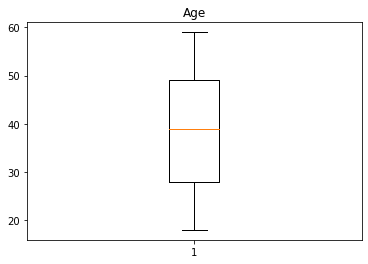

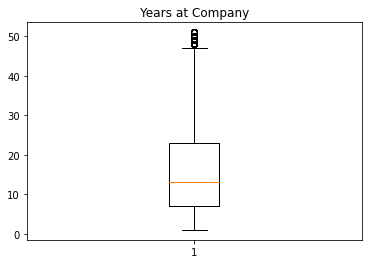

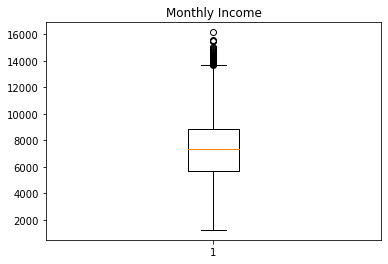

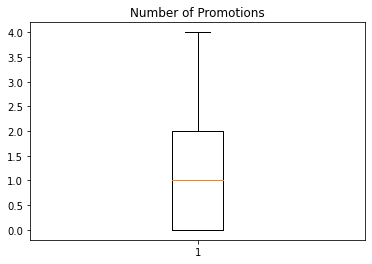

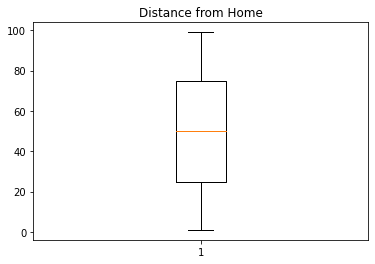

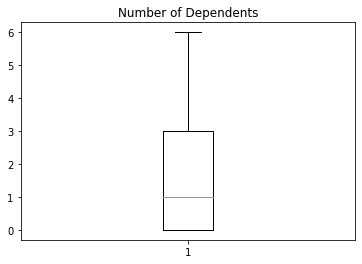

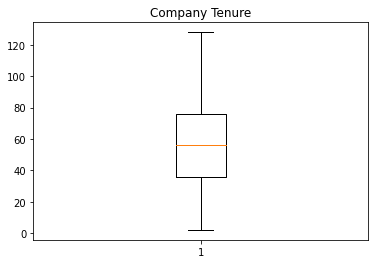

In [24]:
for i in num_columns:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)

In [25]:
#Years at Company and Monthly Income has outliers

In [26]:
for i in ['Years at Company','Monthly Income']:
    print('Skewness value of column', i, 'is', df[i].skew())

Skewness value of column Years at Company is 0.7899082019432808
Skewness value of column Monthly Income is 0.11831228795852874


In [27]:
#So all are skewed here we are taking IQR Method

In [28]:
#IQR METHOD

In [29]:
for i in ['Years at Company','Monthly Income']:
    Q1=np.percentile(df[i],25,method='midpoint')
    Q3=np.percentile(df[i],75,method='midpoint')
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    outliers=[]
    for j in df[i]:
        if ((j < low_lim) | (j > up_lim)):
            outliers.append(j)    
    df[i]=df[i].clip(lower=low_lim,upper=up_lim)

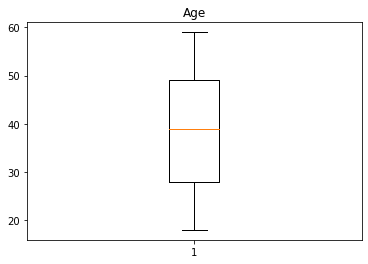

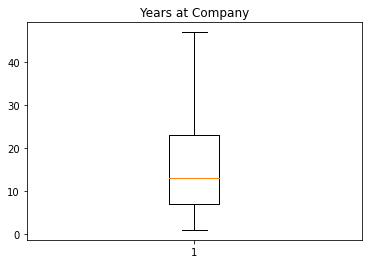

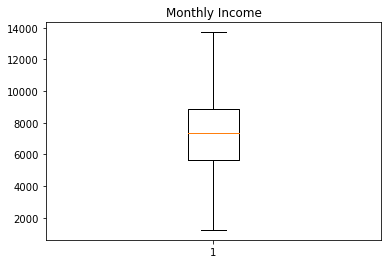

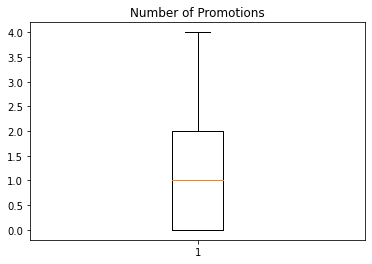

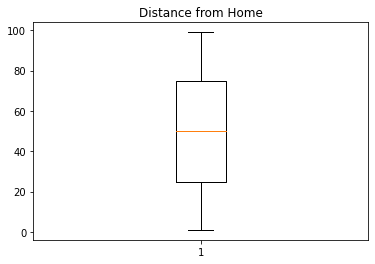

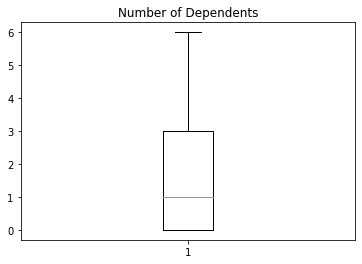

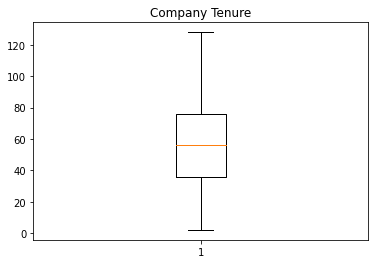

In [30]:
for i in num_columns:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)

In [31]:
#All Outliers are removed

In [32]:
#Correlation

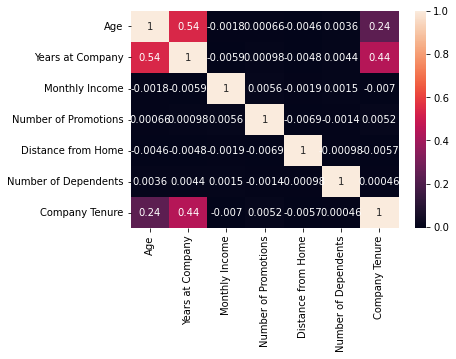

In [33]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [34]:
#Label Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le=LabelEncoder()

In [37]:
df.columns

Index(['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income',
       'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Company Tenure', 'Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       74498 non-null  int64  
 1   Gender                    74498 non-null  object 
 2   Years at Company          74498 non-null  float64
 3   Job Role                  74498 non-null  object 
 4   Monthly Income            74498 non-null  float64
 5   Work-Life Balance         74498 non-null  object 
 6   Job Satisfaction          74498 non-null  object 
 7   Performance Rating        74498 non-null  object 
 8   Number of Promotions      74498 non-null  float64
 9   Overtime                  74498 non-null  object 
 10  Distance from Home        74498 non-null  int64  
 11  Education Level           74498 non-null  object 
 12  Marital Status            74498 non-null  object 
 13  Number of Dependents      74498 non-null  float64
 14  Job Le

In [39]:
cat_cols=['Gender','Job Role','Work-Life Balance','Job Satisfaction','Performance Rating','Overtime','Education Level','Marital Status',
         'Job Level','Company Size','Remote Work','Leadership Opportunities','Innovation Opportunities','Company Reputation',
         'Employee Recognition','Attrition']

In [40]:
# Fit and transform categorical columns
for i in cat_cols:
    df[i] = le.fit_transform(df[i])

In [41]:
df

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,1,19.0,0,5390.0,0,2,0,2.0,0,...,0.0,1,1,89,0,0,0,0,2,1
1,59,0,4.0,3,5534.0,3,0,3,3.0,0,...,3.0,1,1,21,0,0,0,1,1,1
2,24,0,10.0,2,8159.0,2,0,3,0.0,0,...,3.0,1,1,74,0,0,0,3,1,1
3,36,0,7.0,0,3989.0,2,0,2,1.0,0,...,2.0,1,2,50,1,0,0,2,2,1
4,56,1,41.0,0,4821.0,1,3,0,0.0,1,...,0.0,2,1,68,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,56,0,42.0,2,7830.0,3,2,0,0.0,1,...,0.0,2,1,60,0,0,0,3,2,1
74494,30,0,15.0,0,3856.0,2,2,0,2.0,1,...,0.0,0,1,20,0,0,0,2,2,0
74495,52,1,5.0,0,5654.0,2,3,1,0.0,0,...,4.0,1,2,7,0,0,0,2,0,0
74496,18,1,4.0,0,5276.0,1,0,0,0.0,0,...,3.0,1,0,5,0,0,0,3,0,1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       74498 non-null  int64  
 1   Gender                    74498 non-null  int32  
 2   Years at Company          74498 non-null  float64
 3   Job Role                  74498 non-null  int32  
 4   Monthly Income            74498 non-null  float64
 5   Work-Life Balance         74498 non-null  int32  
 6   Job Satisfaction          74498 non-null  int32  
 7   Performance Rating        74498 non-null  int32  
 8   Number of Promotions      74498 non-null  float64
 9   Overtime                  74498 non-null  int32  
 10  Distance from Home        74498 non-null  int64  
 11  Education Level           74498 non-null  int32  
 12  Marital Status            74498 non-null  int32  
 13  Number of Dependents      74498 non-null  float64
 14  Job Le

In [43]:
#all objects are converted to numerical data

In [44]:
X=df.drop('Attrition',axis=True)#independent
y=df['Attrition']#independent

In [45]:
#Standard Scaling

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc=StandardScaler()

In [48]:
X_sc=sc.fit_transform(X)

In [49]:
X_sc

array([[-0.62314922,  0.90816768,  0.29354228, ..., -0.44044638,
        -2.06876918,  0.9928658 ],
       [ 1.69408415, -1.10111825, -1.04595182, ..., -0.44044638,
        -0.92288473, -0.18027482],
       [-1.20245756, -1.10111825, -0.51015418, ..., -0.44044638,
         1.36888416, -0.18027482],
       ...,
       [ 1.11477581,  0.90816768, -0.95665221, ..., -0.44044638,
         0.22299971, -1.35341545],
       [-1.69900757,  0.90816768, -1.04595182, ..., -0.44044638,
         1.36888416, -1.35341545],
       [ 1.69408415, -1.10111825,  2.79393126, ..., -0.44044638,
         0.22299971,  2.16600643]])

In [50]:
X_sc=pd.DataFrame(X_sc)

In [51]:
X_sc

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-0.623149,0.908168,0.293542,-1.440147,-0.887439,-1.566122,0.733695,-0.733512,1.172564,-0.696632,...,-0.296089,-1.062252,0.263885,-0.142671,1.309985,-0.485238,-0.227075,-0.440446,-2.068769,0.992866
1,1.694084,-1.101118,-1.045952,0.598620,-0.820495,1.616331,-0.901132,2.410266,2.177323,-0.696632,...,-1.774408,0.868749,0.263885,-0.142671,-1.367267,-0.485238,-0.227075,-0.440446,-0.922885,-0.180275
2,-1.202458,-1.101118,-0.510154,-0.080969,0.399835,0.555513,-0.901132,2.410266,-0.836952,-0.696632,...,-0.296089,0.868749,0.263885,-0.142671,0.719415,-0.485238,-0.227075,-0.440446,1.368884,-0.180275
3,-0.209358,-1.101118,-0.778053,-1.440147,-1.538747,0.555513,-0.901132,1.362340,0.167806,-0.696632,...,1.182231,0.225082,0.263885,1.285537,-0.225498,2.060844,-0.227075,-0.440446,0.223000,0.992866
4,1.445809,0.908168,2.258134,-1.440147,-1.151960,-0.505305,1.551108,-0.733512,-0.836952,1.435478,...,-1.774408,-1.062252,1.597237,-0.142671,0.483187,-0.485238,-0.227075,-0.440446,-0.922885,0.992866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,1.445809,-1.101118,2.347433,-0.080969,0.246887,1.616331,0.733695,-0.733512,-0.836952,1.435478,...,1.182231,-1.062252,1.597237,-0.142671,0.168216,-0.485238,-0.227075,-0.440446,1.368884,0.992866
74494,-0.705908,-1.101118,-0.063656,-1.440147,-1.600577,0.555513,0.733695,-0.733512,1.172564,1.435478,...,-0.296089,-1.062252,-1.069466,-0.142671,-1.406638,-0.485238,-0.227075,-0.440446,0.223000,0.992866
74495,1.114776,0.908168,-0.956652,-1.440147,-0.764708,0.555513,1.551108,0.314414,-0.836952,-0.696632,...,-0.296089,1.512417,0.263885,1.285537,-1.918466,-0.485238,-0.227075,-0.440446,0.223000,-1.353415
74496,-1.699008,0.908168,-1.045952,-1.440147,-0.940436,-0.505305,-0.901132,-0.733512,-0.836952,-0.696632,...,-1.774408,0.868749,0.263885,-1.570880,-1.997209,-0.485238,-0.227075,-0.440446,1.368884,-1.353415


In [52]:
X_sc.describe()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
count,7.449800e+04,7.449800e+04,7.449800e+04,7.449800e+04,7.449800e+04,7.449800e+04,7.449800e+04,7.449800e+04,7.449800e+04,7.449800e+04,...,7.449800e+04,7.449800e+04,7.449800e+04,7.449800e+04,7.449800e+04,7.449800e+04,7.449800e+04,7.449800e+04,7.449800e+04,7.449800e+04
mean,1.550420e-16,6.110027e-16,1.415151e-15,-1.613011e-15,2.162385e-16,-6.537303e-16,1.303085e-15,3.359938e-16,2.197559e-16,-2.174590e-15,...,1.216420e-16,1.010121e-15,8.563089e-16,9.862681e-16,2.147363e-16,6.720189e-16,-2.751542e-16,-2.128443e-15,-2.360662e-15,5.717280e-17
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,...,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-1.699008e+00,-1.101118e+00,-1.313851e+00,-1.440147e+00,-2.823232e+00,-1.566122e+00,-9.011316e-01,-7.335116e-01,-8.369525e-01,-6.966320e-01,...,-1.774408e+00,-1.062252e+00,-1.069466e+00,-1.570880e+00,-2.115323e+00,-4.852381e-01,-2.270755e-01,-4.404464e-01,-2.068769e+00,-1.353415e+00
25%,-8.714242e-01,-1.101118e+00,-7.780530e-01,-7.605582e-01,-7.656383e-01,-5.053045e-01,-9.011316e-01,-7.335116e-01,-8.369525e-01,-6.966320e-01,...,-2.960885e-01,-1.062252e+00,-1.069466e+00,-1.426713e-01,-7.766966e-01,-4.852381e-01,-2.270755e-01,-4.404464e-01,-9.228847e-01,-1.802748e-01
50%,3.891746e-02,9.081677e-01,-2.422554e-01,-8.096906e-02,2.281144e-02,5.555132e-01,-8.371852e-02,-7.335116e-01,1.678059e-01,-6.966320e-01,...,-2.960885e-01,-4.185850e-01,2.638854e-01,-1.426713e-01,1.073043e-02,-4.852381e-01,-2.270755e-01,-4.404464e-01,2.229997e-01,-1.802748e-01
75%,8.665008e-01,9.081677e-01,6.507407e-01,1.278209e+00,7.331600e-01,5.555132e-01,7.336946e-01,1.362340e+00,1.172564e+00,1.435478e+00,...,1.182231e+00,8.687495e-01,2.638854e-01,1.285537e+00,7.981575e-01,-4.852381e-01,-2.270755e-01,-4.404464e-01,2.229997e-01,9.928658e-01
max,1.694084e+00,9.081677e-01,2.793931e+00,1.278209e+00,2.981357e+00,1.616331e+00,1.551108e+00,2.410266e+00,3.182081e+00,1.435478e+00,...,1.182231e+00,2.799751e+00,1.597237e+00,1.285537e+00,2.845468e+00,2.060844e+00,4.403822e+00,2.270424e+00,1.368884e+00,2.166006e+00


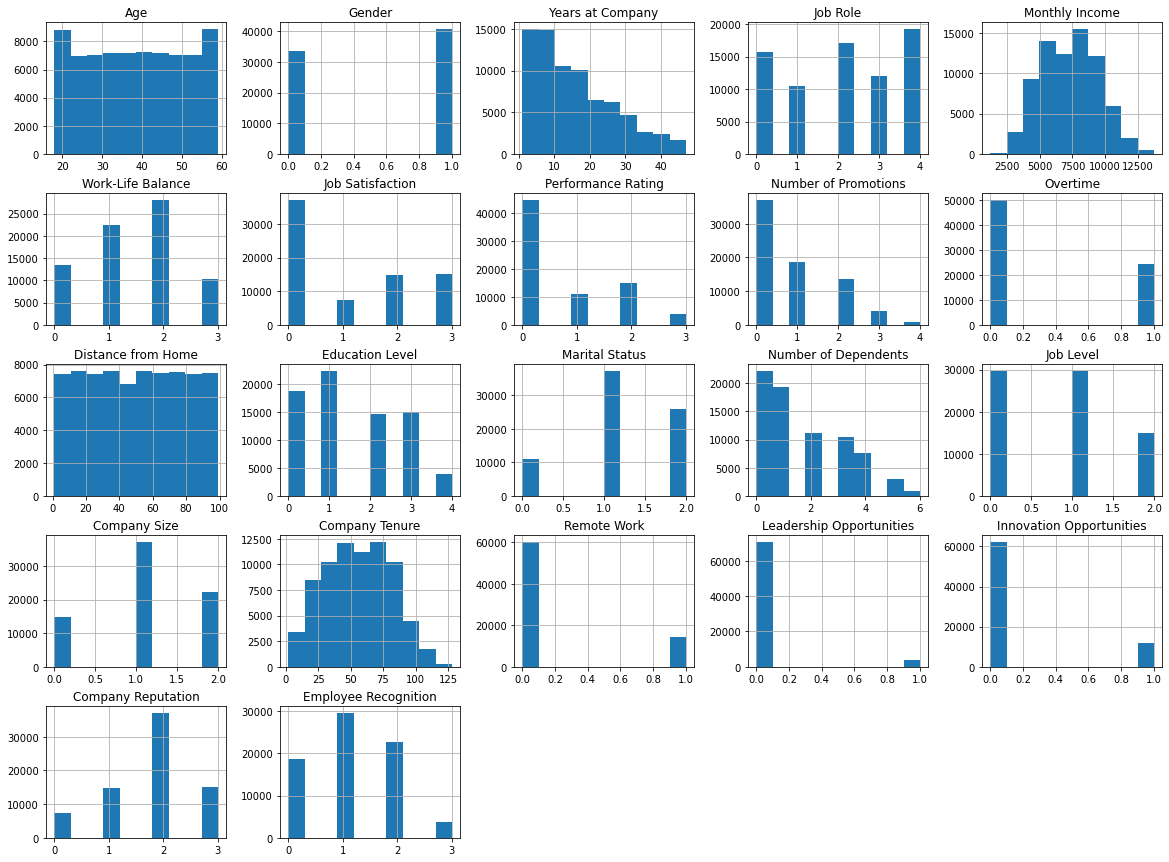

In [53]:
X.hist(figsize=(20,15)) #before scaling plot
plt.show() 

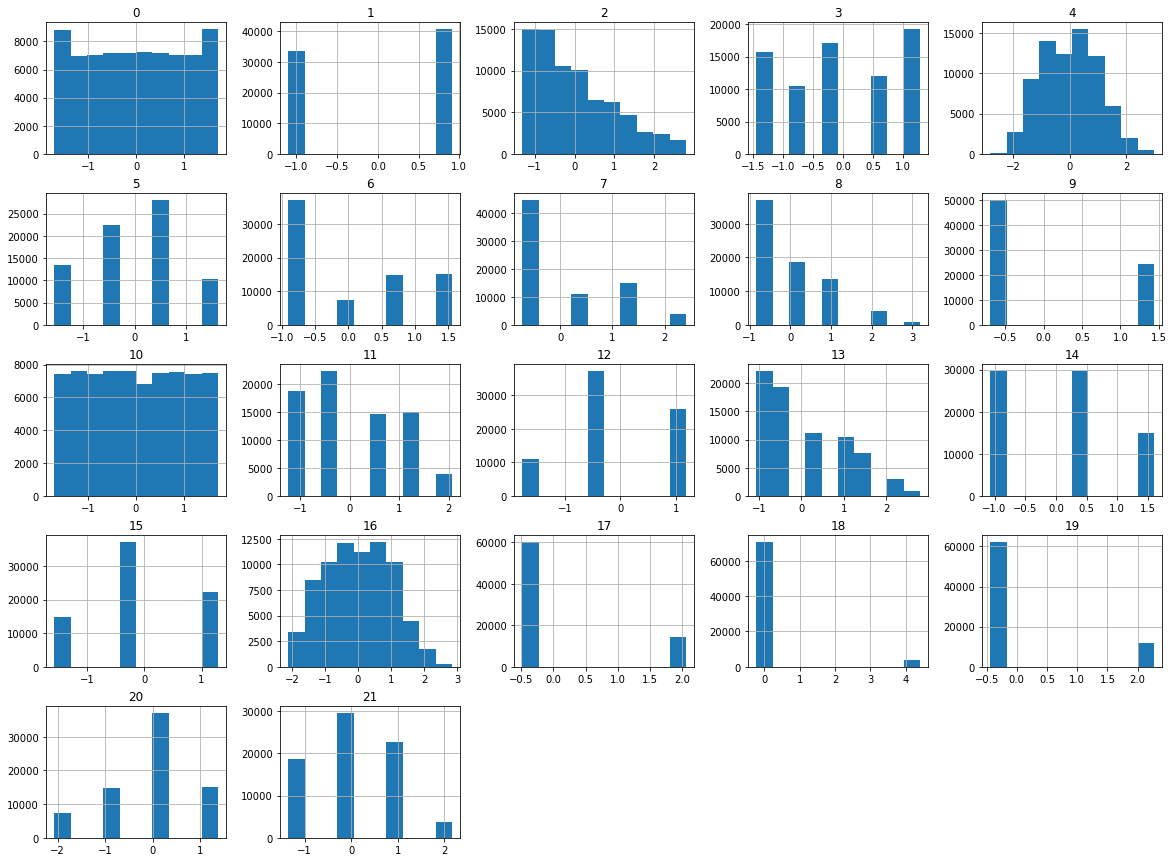

In [54]:
X_sc.hist(figsize=(20,15))  #after scaling also the graph hasn't changed it is skewed but the range changed
plt.show() #after scaling plot

In [55]:
#Data splitting

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,random_state=42,test_size=0.20)

LOGISTIC REGRESSION

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [58]:
log_reg=LogisticRegression(max_iter=10000)
log_reg.fit(X_train,y_train)
log_reg_pred=log_reg.predict(X_test)
print('Accuracy of Logistic Regression Model', accuracy_score(y_test,log_reg_pred))
print('Precision of Logistic Regression Model', precision_score(y_test,log_reg_pred,average='weighted'))
print('Recall of Logistic Regression Model:',recall_score(y_test,log_reg_pred,average='weighted'))
print('F1 score of Logistic Regression Model', f1_score(y_test,log_reg_pred,average='weighted'))

Accuracy of Logistic Regression Model 0.7222818791946308
Precision of Logistic Regression Model 0.7221654103733045
Recall of Logistic Regression Model: 0.7222818791946308
F1 score of Logistic Regression Model 0.7222027996292183


K Nearest Neighbor (KNN)

To choose k value

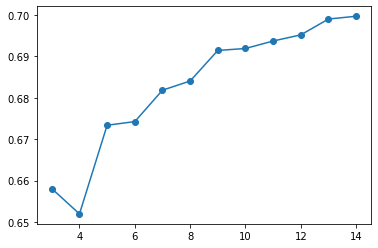

In [59]:
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(X_train,y_train)
    knn_pred=classifier.predict(X_test)
    metric_k.append(accuracy_score(y_test,knn_pred))
plt.plot(neighbors,metric_k,'o-')   
plt.show()

High accuracy got for k values 14. So choose k as 14 and do classification

In [60]:
classifier=KNeighborsClassifier(n_neighbors=14,metric='euclidean')
classifier.fit(X_train,y_train)
knn_pred=classifier.predict(X_test)
print('Accuracy of KNN Classifier', accuracy_score(y_test,knn_pred))
print('Precision of KNN Classifier', precision_score(y_test,knn_pred,average='weighted'))
print('Recall of KNN Classifier:',recall_score(y_test,knn_pred,average='weighted'))
print('F1 score of KNN Classifier', f1_score(y_test,knn_pred,average='weighted'))

Accuracy of KNN Classifier 0.6996644295302014
Precision of KNN Classifier 0.7028806906101236
Recall of KNN Classifier: 0.6996644295302014
F1 score of KNN Classifier 0.6996576587547321


Decision Tree

In [61]:
dt_clf=DecisionTreeClassifier(max_depth=50,criterion='entropy',min_samples_leaf=5)
dt_clf.fit(X_train,y_train)
dt_pred=dt_clf.predict(X_test)
print('Accuracy of Decision Tree Classifier', accuracy_score(y_test,dt_pred))
print('Precision of Decision Tree Classifier', precision_score(y_test,dt_pred,average='weighted'))
print('Recall of Decision Tree Classifier:',recall_score(y_test,dt_pred,average='weighted'))
print('F1 score of Decision Tree Classifier', f1_score(y_test,dt_pred,average='weighted'))

Accuracy of Decision Tree Classifier 0.6757046979865772
Precision of Decision Tree Classifier 0.6761293341917525
Recall of Decision Tree Classifier: 0.6757046979865772
F1 score of Decision Tree Classifier 0.6758351918720008


Random Forest

In [62]:
rf_clf=RandomForestClassifier(criterion='gini',min_samples_split=3,min_samples_leaf=5,max_features='sqrt')
rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict(X_test)
print('Accuracy of Random Forest Classifier', accuracy_score(y_test,rf_pred))
print('Precision of Random Forest Classifier', precision_score(y_test,rf_pred,average='weighted'))
print('Recall of Random Forest Classifier:',recall_score(y_test,rf_pred,average='weighted'))
print('F1 score of Random Forest Classifier', f1_score(y_test,rf_pred,average='weighted'))

Accuracy of Random Forest Classifier 0.7551677852348994
Precision of Random Forest Classifier 0.7550480301563743
Recall of Random Forest Classifier: 0.7551677852348994
F1 score of Random Forest Classifier 0.7550620520123571


Support Vector Machine (SVM)

In [ ]:
'''
sv_clf=SVC(kernel='linear')
sv_clf.fit(X_train,y_train)
svm_pred=sv_clf.predict(X_test)
print('Accuracy of SVM Classifier', accuracy_score(y_test,svm_pred))
print('Precision of SVM Classifier', precision_score(y_test,svm_pred,average='weighted'))
print('Recall of SVM Classifier:',recall_score(y_test,svm_pred,average='weighted'))
print('F1 score of SVM Classifier', f1_score(y_test,svm_pred,average='weighted'))''' #not running

OBSERVATION: For this classification problem, Random Forest has highest accuracy as compared to others accuracy as 0.75.

Using Fine Tuned Random Forest Classifier for prediction

In [75]:
df['Attrition'].value_counts()

1    39128
0    35370
Name: Attrition, dtype: int64

In [78]:
df.head(10)

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,1,19.0,0,5390.0,0,2,0,2.0,0,...,0.0,1,1,89,0,0,0,0,2,1
1,59,0,4.0,3,5534.0,3,0,3,3.0,0,...,3.0,1,1,21,0,0,0,1,1,1
2,24,0,10.0,2,8159.0,2,0,3,0.0,0,...,3.0,1,1,74,0,0,0,3,1,1
3,36,0,7.0,0,3989.0,2,0,2,1.0,0,...,2.0,1,2,50,1,0,0,2,2,1
4,56,1,41.0,0,4821.0,1,3,0,0.0,1,...,0.0,2,1,68,0,0,0,1,2,1
5,38,0,3.0,4,9977.0,1,0,1,3.0,0,...,0.0,1,1,47,0,0,1,1,0,0
6,47,1,23.0,0,3681.0,1,0,2,1.0,1,...,3.0,0,2,93,0,0,0,2,2,0
7,48,1,16.0,1,11223.0,0,3,2,2.0,0,...,4.0,0,1,88,0,0,0,0,1,1
8,57,1,44.0,0,3773.0,2,2,2,1.0,1,...,4.0,0,1,75,0,0,0,1,2,1
9,24,0,1.0,2,7319.0,3,0,0,1.0,1,...,4.0,0,0,45,0,0,1,2,1,0


In [79]:
df[['Distance from Home','Education Level','Marital Status']].head(10)

,Distance from Home,Education Level,Marital Status
0,22,0,1
1,21,3,0
2,11,1,1
3,27,2,2
4,71,2,0
5,37,1,1
6,75,2,0
7,5,3,1
8,39,1,1
9,57,4,2


In [71]:
prediction=rf_clf.predict([[31,1,19.0,0,5390.0,0,2,2,2.0,0,22,0,1,0.0,1,1,89,0,0,0,0,2]])
print(prediction[0])

1


Here the prediction is right as the employee stayed therefore 1

In [80]:
prediction=rf_clf.predict([[24,0,1.0,2,7319.0,3,0,0,1.0,1,57,4,2,4.0,0,0,45,0,0,1,2,1]])
print(prediction[0])

0


Here the prediction is right as the employee left therefore 0